In [102]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import re
from matplotlib import cm
import requests
from random import shuffle
from pandas.io.json import json_normalize

In [103]:
# This is data from the city of new york site about permitted events.
# For more info: https://data.cityofnewyork.us/City-Government/NYC-Permitted-Event-Information/tvpp-9vvx

In [104]:
# Decided to go with the api rather than csv since it's updated daily

In [105]:
json_path = 'https://data.cityofnewyork.us/resource/8end-qv57.json'
df = pd.read_json(json_path)
print(df[:5])

  community_board       end_date_time                   event_agency  \
0             2,  2017-11-22 20:00:00               Parks Department   
1             2,  2017-11-12 11:15:00               Parks Department   
2             9,  2017-11-22 18:00:00  Street Activity Permit Office   
3             2,  2017-11-09 11:15:00               Parks Department   
4            11,  2017-11-09 17:00:00  Street Activity Permit Office   

   event_borough  event_id                                     event_location  \
0  Staten Island    335783  LaTourette Park & Golf Course: Model Airplane ...   
1  Staten Island    369134                   Willowbrook Park: Carousel Lawn    
2      Manhattan    340926   HAMILTON PLACE between WEST  143 STREET and W...   
3  Staten Island    369134                   Willowbrook Park: Carousel Lawn    
4      Manhattan    324471   EAST  104 STREET between SECOND AVENUE and TH...   

                                         event_name event_street_side  \
0  Octo

In [106]:
# How many permits are there for upcoming events by borough:

In [107]:
df.groupby(['event_borough']).size()

event_borough
Bronx             92
Brooklyn         172
Manhattan        574
Queens            97
Staten Island     65
dtype: int64

In [108]:
df.groupby(['event_borough','event_type']).size()

event_borough  event_type                    
Bronx          Block Party                         2
               Farmers Market                     17
               Parade                              2
               Special Event                      70
               Street Event                        1
Brooklyn       Block Party                        11
               Construction                        1
               Farmers Market                     26
               Parade                              5
               Plaza Event                         1
               Shooting Permit                     1
               Sidewalk Sale                       4
               Single Block Festival               1
               Special Event                     120
               Street Event                        1
               Street Festival                     1
Manhattan      Block Party                        10
               Construction                      193


In [109]:
# Graphing number of upcoming events by type and borough

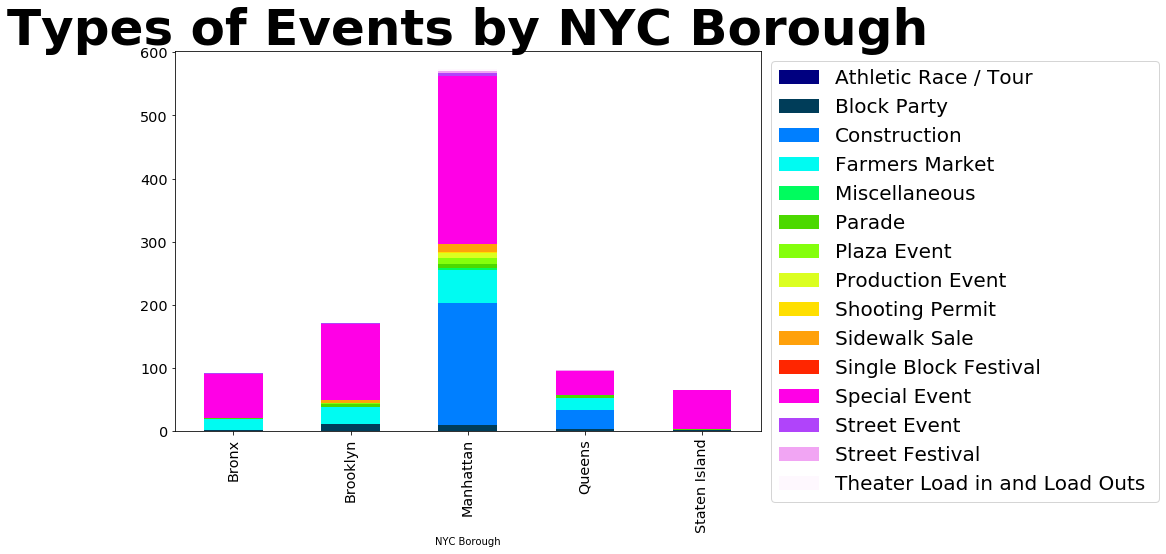

In [110]:
bar = df.groupby(['event_borough','event_type']).size().unstack().plot(kind='bar', 
                                                                       stacked=True, 
                                                                       fontsize = 'x-large', 
                                                                       colormap='gist_ncar')
bar.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=20)
box = bar.get_position()
bar.set_position([box.x0, box.y0, box.width * 1.75, box.height * 1.75])
bar.set_xlabel('NYC Borough')
bar.set_title('Types of Events by NYC Borough', fontsize=50, fontweight='bold')
plt.show(bar)

In [111]:
#checking that the date times are perceived as such
print(type(df['start_date_time'][3]))
print(type(df['end_date_time'][3]))

<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>


In [112]:
# Let's see on what day of the week is there the most upcoming events?

In [113]:
df['start_weekday'] = df['start_date_time'].dt.weekday_name

In [114]:
print(df['start_weekday'][:5])

0    Wednesday
1       Sunday
2    Wednesday
3     Thursday
4     Thursday
Name: start_weekday, dtype: object


In [115]:
df['end_weekday'] = df['end_date_time'].dt.weekday_name

In [116]:
print(df['end_weekday'][:5])

0    Wednesday
1       Sunday
2    Wednesday
3     Thursday
4     Thursday
Name: end_weekday, dtype: object


In [117]:
wk0 = df[['start_weekday', 'event_id']].groupby(['start_weekday']).count()
wk0.sort_values('event_id', ascending=False)

,event_id
start_weekday,
Thursday,228
Wednesday,174
Sunday,166
Saturday,159
Friday,139
Tuesday,78
Monday,56


In [118]:
# Most upcoming events are on Thursday and the least are on Monday
# Now we can take a look at day of the week events by borough and type

In [119]:
wk1 = df[['start_weekday', 'event_borough','event_type', 'event_id']].groupby(['start_weekday', 'event_borough','event_type']).count()

In [120]:
wk1

event_id
start_weekday event_borough event_type                              
Friday        Bronx         Farmers Market                         3
                            Special Event                         11
              Brooklyn      Farmers Market                         4
                            Sidewalk Sale                          2
                            Special Event                         12
              Manhattan     Construction                          35
                            Farmers Market                         8
                            Production Event                       1
                            Shooting Permit                        1
                            Sidewalk Sale                          4
                            Special Event                         33
                            Street Event                           2
              Queens        Construction                           6
                            Farmers Market                         4
                            Special Event                          3
              Staten Island Special Event                         10
Monday        Bronx         Special Event                          6
              Brooklyn      Construction                           1
                            Plaza Event                            1
                            Special Event                          6
              Manhattan     Construction                          14
                            Farmers Market                         1
                            Miscellaneous                          1
                            Production Event                       1
                            Special Event                         16
                            Theater Load in and Load Outs          2
              Queens        Construction                           3
                            Special Event                          1
              Staten Island Special Event                          3
Saturday      Bronx         Block Party                            2
...                                                              ...
Tuesday       Brooklyn      Parade                                 2
                            Special Event                          3
              Manhattan     Block Party                            8
                            Construction                           9
                            Farmers Market                         1
                            Parade                                 3
                            Plaza Event                            1
                            Production Event                       1
                            Special Event                         22
              Queens        Construction                           2
                            Farmers Market                         1
                            Parade                                 3
                            Special Event                          2
              Staten Island Special Event                          6
Wednesday     Bronx         Farmers Market                         7
                            Special Event                         22
              Brooklyn      Farmers Market                         4
                            Special Event                         21
                            Street Event                           1
              Manhattan     Construction                          34
                            Farmers Market                         7
                            Miscellaneous                          1
                            Plaza Event                            6
                            Special Event                         49
                            Street Event                           1
                            Theater Load in and Load Outs 

In [121]:
wk1

event_id
start_weekday event_borough event_type                              
Friday        Bronx         Farmers Market                         3
                            Special Event                         11
              Brooklyn      Farmers Market                         4
                            Sidewalk Sale                          2
                            Special Event                         12
              Manhattan     Construction                          35
                            Farmers Market                         8
                            Production Event                       1
                            Shooting Permit                        1
                            Sidewalk Sale                          4
                            Special Event                         33
                            Street Event                           2
              Queens        Construction                           6
                            Farmers Market                         4
                            Special Event                          3
              Staten Island Special Event                         10
Monday        Bronx         Special Event                          6
              Brooklyn      Construction                           1
                            Plaza Event                            1
                            Special Event                          6
              Manhattan     Construction                          14
                            Farmers Market                         1
                            Miscellaneous                          1
                            Production Event                       1
                            Special Event                         16
                            Theater Load in and Load Outs          2
              Queens        Construction                           3
                            Special Event                          1
              Staten Island Special Event                          3
Saturday      Bronx         Block Party                            2
...                                                              ...
Tuesday       Brooklyn      Parade                                 2
                            Special Event                          3
              Manhattan     Block Party                            8
                            Construction                           9
                            Farmers Market                         1
                            Parade                                 3
                            Plaza Event                            1
                            Production Event                       1
                            Special Event                         22
              Queens        Construction                           2
                            Farmers Market                         1
                            Parade                                 3
                            Special Event                          2
              Staten Island Special Event                          6
Wednesday     Bronx         Farmers Market                         7
                            Special Event                         22
              Brooklyn      Farmers Market                         4
                            Special Event                         21
                            Street Event                           1
              Manhattan     Construction                          34
                            Farmers Market                         7
                            Miscellaneous                          1
                            Plaza Event                            6
                            Special Event                         49
                            Street Event                           1
                            Theater Load in and Load Outs 

In [122]:
sort1 = wk1.sort_values('event_id', ascending=False)

In [123]:
sort1

event_id
start_weekday event_borough event_type                     
Thursday      Manhattan     Construction                 58
                            Special Event                56
Wednesday     Manhattan     Special Event                49
Saturday      Manhattan     Special Event                45
Sunday        Manhattan     Special Event                44
Friday        Manhattan     Construction                 35
Wednesday     Manhattan     Construction                 34
Friday        Manhattan     Special Event                33
Thursday      Brooklyn      Special Event                31
Sunday        Brooklyn      Special Event                25
              Manhattan     Construction                 25
Saturday      Brooklyn      Special Event                22
Tuesday       Manhattan     Special Event                22
Wednesday     Bronx         Special Event                22
              Brooklyn      Special Event                21
Thursday      Manhattan     Farmers Market               19
Saturday      Manhattan     Construction                 18
Thursday      Staten Island Special Event                17
              Bronx         Special Event                16
Monday        Manhattan     Special Event                16
Sunday        Queens        Special Event                14
Monday        Manhattan     Construction                 14
Friday        Brooklyn      Special Event                12
Saturday      Manhattan     Farmers Market               12
Sunday        Staten Island Special Event                11
Friday        Bronx         Special Event                11
Wednesday     Staten Island Special Event                10
Friday        Staten Island Special Event                10
Saturday      Brooklyn      Farmers Market                9
Tuesday       Manhattan     Construction                  9
...                                                     ...
Wednesday     Brooklyn      Street Event                  1
Tuesday       Manhattan     Plaza Event                   1
Monday        Queens        Special Event                 1
Thursday      Manhattan     Street Event                  1
Sunday        Brooklyn      Block Party                   1
Saturday      Bronx         Farmers Market                1
              Brooklyn      Parade                        1
                            Single Block Festival         1
              Manhattan     Block Party                   1
Monday        Manhattan     Production Event              1
Saturday      Manhattan     Miscellaneous                 1
Monday        Manhattan     Miscellaneous                 1
Saturday      Manhattan     Street Festival               1
              Queens        Parade                        1
                            Sidewalk Sale                 1
              Staten Island Block Party                   1
Monday        Manhattan     Farmers Market                1
Thursday      Manhattan     Plaza Event                   1
Sunday        Brooklyn      Street Festival               1
              Manhattan     Block Party                   1
                            Parade                        1
Monday        Brooklyn      Plaza Event                   1
Sunday        Queens        Parade                        1
Monday        Brooklyn      Construction                  1
Sunday        Queens        Street Event                  1
                            Street Festival               1
              Staten Island Parade                        1
Thursday      Bronx         Street Event                  1
              Brooklyn      Shooting Permit               1
Sunday        Staten Island Athletic Race / Tour          1

[130 rows x 1 columns]

In [124]:
# The most upcoming permitted events of one type in one borough are 49 special events in Manhattan on Thursdays and Sundays
# Followed by 47 permitted construction events on Thursdays in Manhattan

In [125]:
# Now I'm wondering what is a Special Event though...

In [126]:
sp = df.loc[(df['event_type'] == 'Special Event')]

In [127]:
sp

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,start_weekday,end_weekday
0,"2,",2017-11-22 20:00:00,Parks Department,Staten Island,335783,LaTourette Park & Golf Course: Model Airplane ...,"October, November December model aircraft flying",NaN,Special Event,"122,",2017-11-22 09:00:00,N/A,Wednesday,Wednesday
1,"2,",2017-11-12 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,"122,",2017-11-12 10:00:00,N/A,Sunday,Sunday
3,"2,",2017-11-09 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,"122,",2017-11-09 10:00:00,N/A,Thursday,Thursday
8,"2,",2017-10-28 12:00:00,Parks Department,Brooklyn,376147,Pierrepont Playground: Pierrepont Playground,Pierrepont Playground Halloween Parade,NaN,Special Event,"84,",2017-10-28 10:00:00,N/A,Saturday,Saturday
9,"7,",2017-10-25 16:00:00,Parks Department,Bronx,330038,Mosholu Parkway: Mosholu Parkway,North Central Bronx Farmer's Market,NaN,Special Event,"52,",2017-10-25 08:00:00,N/A,Wednesday,Wednesday
12,"4,",2017-11-16 16:00:00,Parks Department,Bronx,330050,Mount Eden Malls: Mount Eden Malls,Mt. Eden Farmer's Market,NaN,Special Event,"44,",2017-11-16 08:00:00,N/A,Thursday,Thursday
13,"64,",2017-10-26 15:00:00,Parks Department,Manhattan,375228,Central Park: North Reservoir Landscape B,Athletic Event Non Sports,NaN,Special Event,"22,",2017-10-26 13:00:00,N/A,Thursday,Thursday
14,"1,",2017-11-05 16:00:00,Parks Department,Brooklyn,339605,Monsignor McGolrick Park: Central Plaza,McGolrick Park Farmers Market,NaN,Special Event,"94,",2017-11-05 10:00:00,N/A,Sunday,Sunday
23,"2,",2017-10-25 20:00:00,Parks Department,Staten Island,335783,LaTourette Park & Golf Course: Model Airplane ...,"October, November December model aircraft flying",NaN,Special Event,"122,",2017-10-25 09:00:00,N/A,Wednesday,Wednesday
27,"3,",2017-11-16 16:00:00,Parks Department,Brooklyn,330035,Marcy Playground: Marcy Playground,Marcy Park Farmer's Market,NaN,Special Event,"79,",2017-11-16 08:00:00,N/A,Thursday,Thursday


In [128]:
# Looking at the event names in the filtered df snapshot, some of these "Special Events" are parades, some farmer's markets
# How many permits have been obtained with a event type mislabled as "Special Events"?

In [129]:
df.groupby('event_type').size()

event_type
Athletic Race / Tour                1
Block Party                        27
Construction                      225
Farmers Market                    113
Miscellaneous                       3
Parade                             19
Plaza Event                        11
Production Event                    9
Shooting Permit                     2
Sidewalk Sale                      18
Single Block Festival               1
Special Event                     554
Street Event                        9
Street Festival                     5
Theater Load in and Load Outs       3
dtype: int64

In [130]:
df.groupby(['event_agency', 'event_type']).size()

event_agency                                    event_type                    
Mayor's Office of Film, Theatre & Broadcasting  Shooting Permit                     2
                                                Theater Load in and Load Outs       3
Parks Department                                Construction                      225
                                                Special Event                     554
Police Department                               Athletic Race / Tour                1
                                                Parade                             19
Street Activity Permit Office                   Block Party                        27
                                                Farmers Market                    113
                                                Miscellaneous                       3
                                                Plaza Event                        11
                                                Production Ev

In [131]:
# Looks like the Parks Department is the only one to label things as "Special Events" 
# We can take a closer look at the Special Events dataframe now: sp

In [132]:
sp_not_special = sp.loc[df['event_name'].str.contains(re.compile(
    'theater|constuction|athletic|parade|block|farmer|plaza|production|sale|street', re.IGNORECASE))]

In [133]:
sp_not_special['event_id'].count()

83

In [134]:
# 84 mislabled Special Events: let's fix that

In [135]:
df

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,start_weekday,end_weekday
0,"2,",2017-11-22 20:00:00,Parks Department,Staten Island,335783,LaTourette Park & Golf Course: Model Airplane ...,"October, November December model aircraft flying",NaN,Special Event,"122,",2017-11-22 09:00:00,N/A,Wednesday,Wednesday
1,"2,",2017-11-12 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,"122,",2017-11-12 10:00:00,N/A,Sunday,Sunday
2,"9,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,340926,HAMILTON PLACE between WEST 143 STREET and W...,Hamilton Heights One-Day Plaza,Full,Plaza Event,"30,",2017-11-22 10:00:00,Full Street Closure,Wednesday,Wednesday
3,"2,",2017-11-09 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,"122,",2017-11-09 10:00:00,N/A,Thursday,Thursday
4,"11,",2017-11-09 17:00:00,Street Activity Permit Office,Manhattan,324471,EAST 104 STREET between SECOND AVENUE and TH...,East Harlem Farmer's Market,Full,Farmers Market,"23,",2017-11-09 07:00:00,Full Street Closure,Thursday,Thursday
5,"7,",2017-11-02 19:00:00,Street Activity Permit Office,Bronx,321758,EAST GUN HILL ROAD between DEKALB AVENUE and ...,Norwood Youthmarket,South,Farmers Market,"52,",2017-11-02 12:00:00,Partial Sidewalk Closure,Thursday,Thursday
6,"7,",2017-10-28 17:00:00,Street Activity Permit Office,Brooklyn,317943,4 AVENUE between 59 STREET and 60 STREET,Sunset Park Greenmarket Saturday,West,Farmers Market,"72,",2017-10-28 08:00:00,Sidewalk and Curb Lane Closure,Saturday,Saturday
7,"4,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,317955,10 AVENUE between WEST 57 STREET and WEST ...,57 Street Greenmarket Wednesday Saturday,East,Farmers Market,"18,",2017-11-22 08:00:00,Sidewalk and Curb Lane Closure,Wednesday,Wednesday
8,"2,",2017-10-28 12:00:00,Parks Department,Brooklyn,376147,Pierrepont Playground: Pierrepont Playground,Pierrepont Playground Halloween Parade,NaN,Special Event,"84,",2017-10-28 10:00:00,N/A,Saturday,Saturday
9,"7,",2017-10-25 16:00:00,Parks Department,Bronx,330038,Mosholu Parkway: Mosholu Parkway,North Central Bronx Farmer's Market,NaN,Special Event,"52,",2017-10-25 08:00:00,N/A,Wednesday,Wednesday


In [136]:
def new_event_type(row):
    if "Special" in row.event_type and "Farmer" in row.event_name:
        return "Farmers Market"
    if "Special" in row.event_type and "Green" in row.event_name:
        return "Farmers Market"
    if "Special" in row.event_type and "arade" in row.event_name:
        return "Parade"
    if "Special" in row.event_type and "Run" in row.event_name:
        return "Athletic Race / Tour"
    if "Special" in row.event_type and "Athletic" in row.event_name:
        return "Athletic Race / Tour"
    if "Special" in row.event_type and "Block" in row.event_name:
        return "Block Party"
    if "Special" in row.event_type and "Film" in row.event_name:
        return "Production Event"
    if "Special" in row.event_type and "Sale" in row.event_name:
        return "Sidewalk Sale"
    if "Special" in row.event_type and "Festival" in row.event_name:
        return "Street Festival"
    # we can add some more categories so that special event is more clear
    if "Special" in row.event_type and "Holiday" in row.event_name:
        return "Holiday Celebration"
    if "Special" in row.event_type and "class" in row.event_name:
        return "Educational Event"
    if "Special" in row.event_type and "Party" in row.event_name:
        return "Party"
    if "Special" in row.event_type and "Protest" in row.event_name:
        return "Protest"
    if "Special" in row.event_type and "Winter" in row.event_name:
        return "Holiday Celebration"
    else:
        return row.event_type
df.loc[:, 'new_event_type'] = df.apply(new_event_type, axis = 1)

In [137]:
df

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,start_weekday,end_weekday,new_event_type
0,"2,",2017-11-22 20:00:00,Parks Department,Staten Island,335783,LaTourette Park & Golf Course: Model Airplane ...,"October, November December model aircraft flying",NaN,Special Event,"122,",2017-11-22 09:00:00,N/A,Wednesday,Wednesday,Special Event
1,"2,",2017-11-12 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,"122,",2017-11-12 10:00:00,N/A,Sunday,Sunday,Educational Event
2,"9,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,340926,HAMILTON PLACE between WEST 143 STREET and W...,Hamilton Heights One-Day Plaza,Full,Plaza Event,"30,",2017-11-22 10:00:00,Full Street Closure,Wednesday,Wednesday,Plaza Event
3,"2,",2017-11-09 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,"122,",2017-11-09 10:00:00,N/A,Thursday,Thursday,Educational Event
4,"11,",2017-11-09 17:00:00,Street Activity Permit Office,Manhattan,324471,EAST 104 STREET between SECOND AVENUE and TH...,East Harlem Farmer's Market,Full,Farmers Market,"23,",2017-11-09 07:00:00,Full Street Closure,Thursday,Thursday,Farmers Market
5,"7,",2017-11-02 19:00:00,Street Activity Permit Office,Bronx,321758,EAST GUN HILL ROAD between DEKALB AVENUE and ...,Norwood Youthmarket,South,Farmers Market,"52,",2017-11-02 12:00:00,Partial Sidewalk Closure,Thursday,Thursday,Farmers Market
6,"7,",2017-10-28 17:00:00,Street Activity Permit Office,Brooklyn,317943,4 AVENUE between 59 STREET and 60 STREET,Sunset Park Greenmarket Saturday,West,Farmers Market,"72,",2017-10-28 08:00:00,Sidewalk and Curb Lane Closure,Saturday,Saturday,Farmers Market
7,"4,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,317955,10 AVENUE between WEST 57 STREET and WEST ...,57 Street Greenmarket Wednesday Saturday,East,Farmers Market,"18,",2017-11-22 08:00:00,Sidewalk and Curb Lane Closure,Wednesday,Wednesday,Farmers Market
8,"2,",2017-10-28 12:00:00,Parks Department,Brooklyn,376147,Pierrepont Playground: Pierrepont Playground,Pierrepont Playground Halloween Parade,NaN,Special Event,"84,",2017-10-28 10:00:00,N/A,Saturday,Saturday,Parade
9,"7,",2017-10-25 16:00:00,Parks Department,Bronx,330038,Mosholu Parkway: Mosholu Parkway,North Central Bronx Farmer's Market,NaN,Special Event,"52,",2017-10-25 08:00:00,N/A,Wednesday,Wednesday,Farmers Market


In [138]:
# While we are cleaning, let remove those commas in the police_precinct column

In [139]:
df['police_precinct'] = df.police_precinct.str.replace(',' , '')

In [140]:
df

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,start_weekday,end_weekday,new_event_type
0,"2,",2017-11-22 20:00:00,Parks Department,Staten Island,335783,LaTourette Park & Golf Course: Model Airplane ...,"October, November December model aircraft flying",NaN,Special Event,122,2017-11-22 09:00:00,N/A,Wednesday,Wednesday,Special Event
1,"2,",2017-11-12 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,122,2017-11-12 10:00:00,N/A,Sunday,Sunday,Educational Event
2,"9,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,340926,HAMILTON PLACE between WEST 143 STREET and W...,Hamilton Heights One-Day Plaza,Full,Plaza Event,30,2017-11-22 10:00:00,Full Street Closure,Wednesday,Wednesday,Plaza Event
3,"2,",2017-11-09 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,122,2017-11-09 10:00:00,N/A,Thursday,Thursday,Educational Event
4,"11,",2017-11-09 17:00:00,Street Activity Permit Office,Manhattan,324471,EAST 104 STREET between SECOND AVENUE and TH...,East Harlem Farmer's Market,Full,Farmers Market,23,2017-11-09 07:00:00,Full Street Closure,Thursday,Thursday,Farmers Market
5,"7,",2017-11-02 19:00:00,Street Activity Permit Office,Bronx,321758,EAST GUN HILL ROAD between DEKALB AVENUE and ...,Norwood Youthmarket,South,Farmers Market,52,2017-11-02 12:00:00,Partial Sidewalk Closure,Thursday,Thursday,Farmers Market
6,"7,",2017-10-28 17:00:00,Street Activity Permit Office,Brooklyn,317943,4 AVENUE between 59 STREET and 60 STREET,Sunset Park Greenmarket Saturday,West,Farmers Market,72,2017-10-28 08:00:00,Sidewalk and Curb Lane Closure,Saturday,Saturday,Farmers Market
7,"4,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,317955,10 AVENUE between WEST 57 STREET and WEST ...,57 Street Greenmarket Wednesday Saturday,East,Farmers Market,18,2017-11-22 08:00:00,Sidewalk and Curb Lane Closure,Wednesday,Wednesday,Farmers Market
8,"2,",2017-10-28 12:00:00,Parks Department,Brooklyn,376147,Pierrepont Playground: Pierrepont Playground,Pierrepont Playground Halloween Parade,NaN,Special Event,84,2017-10-28 10:00:00,N/A,Saturday,Saturday,Parade
9,"7,",2017-10-25 16:00:00,Parks Department,Bronx,330038,Mosholu Parkway: Mosholu Parkway,North Central Bronx Farmer's Market,NaN,Special Event,52,2017-10-25 08:00:00,N/A,Wednesday,Wednesday,Farmers Market


In [141]:
# Now that we have a new_event_type column that gives some more specification to the Special Events,
# we can look make a events by type revised graph

In [142]:
# NOTE: make pivot & then to percentage and then graph
# NOTE2: after that see if can plot on map using addresses, if not maybe latitude and long of precincts?

In [143]:
df

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,start_weekday,end_weekday,new_event_type
0,"2,",2017-11-22 20:00:00,Parks Department,Staten Island,335783,LaTourette Park & Golf Course: Model Airplane ...,"October, November December model aircraft flying",NaN,Special Event,122,2017-11-22 09:00:00,N/A,Wednesday,Wednesday,Special Event
1,"2,",2017-11-12 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,122,2017-11-12 10:00:00,N/A,Sunday,Sunday,Educational Event
2,"9,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,340926,HAMILTON PLACE between WEST 143 STREET and W...,Hamilton Heights One-Day Plaza,Full,Plaza Event,30,2017-11-22 10:00:00,Full Street Closure,Wednesday,Wednesday,Plaza Event
3,"2,",2017-11-09 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,122,2017-11-09 10:00:00,N/A,Thursday,Thursday,Educational Event
4,"11,",2017-11-09 17:00:00,Street Activity Permit Office,Manhattan,324471,EAST 104 STREET between SECOND AVENUE and TH...,East Harlem Farmer's Market,Full,Farmers Market,23,2017-11-09 07:00:00,Full Street Closure,Thursday,Thursday,Farmers Market
5,"7,",2017-11-02 19:00:00,Street Activity Permit Office,Bronx,321758,EAST GUN HILL ROAD between DEKALB AVENUE and ...,Norwood Youthmarket,South,Farmers Market,52,2017-11-02 12:00:00,Partial Sidewalk Closure,Thursday,Thursday,Farmers Market
6,"7,",2017-10-28 17:00:00,Street Activity Permit Office,Brooklyn,317943,4 AVENUE between 59 STREET and 60 STREET,Sunset Park Greenmarket Saturday,West,Farmers Market,72,2017-10-28 08:00:00,Sidewalk and Curb Lane Closure,Saturday,Saturday,Farmers Market
7,"4,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,317955,10 AVENUE between WEST 57 STREET and WEST ...,57 Street Greenmarket Wednesday Saturday,East,Farmers Market,18,2017-11-22 08:00:00,Sidewalk and Curb Lane Closure,Wednesday,Wednesday,Farmers Market
8,"2,",2017-10-28 12:00:00,Parks Department,Brooklyn,376147,Pierrepont Playground: Pierrepont Playground,Pierrepont Playground Halloween Parade,NaN,Special Event,84,2017-10-28 10:00:00,N/A,Saturday,Saturday,Parade
9,"7,",2017-10-25 16:00:00,Parks Department,Bronx,330038,Mosholu Parkway: Mosholu Parkway,North Central Bronx Farmer's Market,NaN,Special Event,52,2017-10-25 08:00:00,N/A,Wednesday,Wednesday,Farmers Market


In [144]:
updated_type = df[['new_event_type', 'event_borough', 'event_id']].groupby(['new_event_type', 'event_borough']).count()

In [145]:
updated_type

event_id
new_event_type                 event_borough          
Athletic Race / Tour           Bronx                 4
                               Brooklyn              5
                               Manhattan            40
                               Queens                9
                               Staten Island        16
Block Party                    Bronx                 2
                               Brooklyn             11
                               Manhattan            10
                               Queens                3
                               Staten Island         1
Construction                   Brooklyn              1
                               Manhattan           193
                               Queens               31
Educational Event              Bronx                11
                               Brooklyn              2
                               Queens                3
                               Staten Island         5
Farmers Market                 Bronx                28
                               Brooklyn             44
                               Manhattan            70
                               Queens               18
Holiday Celebration            Manhattan            25
Miscellaneous                  Manhattan             3
Parade                         Bronx                 3
                               Brooklyn              6
                               Manhattan             7
                               Queens                5
                               Staten Island         1
Party                          Brooklyn              1
                               Manhattan             8
                               Queens                3
Plaza Event                    Brooklyn              1
                               Manhattan            10
Production Event               Manhattan             9
Shooting Permit                Brooklyn              1
                               Manhattan             1
Sidewalk Sale                  Brooklyn              4
                               Manhattan            13
                               Queens                1
Single Block Festival          Brooklyn              1
Special Event                  Bronx                43
                               Brooklyn             91
                               Manhattan           173
                               Queens               21
                               Staten Island        42
Street Event                   Bronx                 1
                               Brooklyn              1
                               Manhattan             6
                               Queens                1
Street Festival                Brooklyn              3
                               Manhattan             3
                               Queens                2
Theater Load in and Load Outs  Manhattan             3

In [146]:
df2 = pd.DataFrame({'Percentage_total_events': df.groupby(('new_event_type', 'event_borough')).size() / len(df)})

In [147]:
df2

Percentage_total_events
new_event_type                 event_borough                         
Athletic Race / Tour           Bronx                            0.004
                               Brooklyn                         0.005
                               Manhattan                        0.040
                               Queens                           0.009
                               Staten Island                    0.016
Block Party                    Bronx                            0.002
                               Brooklyn                         0.011
                               Manhattan                        0.010
                               Queens                           0.003
                               Staten Island                    0.001
Construction                   Brooklyn                         0.001
                               Manhattan                        0.193
                               Queens                           0.031
Educational Event              Bronx                            0.011
                               Brooklyn                         0.002
                               Queens                           0.003
                               Staten Island                    0.005
Farmers Market                 Bronx                            0.028
                               Brooklyn                         0.044
                               Manhattan                        0.070
                               Queens                           0.018
Holiday Celebration            Manhattan                        0.025
Miscellaneous                  Manhattan                        0.003
Parade                         Bronx                            0.003
                               Brooklyn                         0.006
                               Manhattan                        0.007
                               Queens                           0.005
                               Staten Island                    0.001
Party                          Brooklyn                         0.001
                               Manhattan                        0.008
                               Queens                           0.003
Plaza Event                    Brooklyn                         0.001
                               Manhattan                        0.010
Production Event               Manhattan                        0.009
Shooting Permit                Brooklyn                         0.001
                               Manhattan                        0.001
Sidewalk Sale                  Brooklyn                         0.004
                               Manhattan                        0.013
                               Queens                           0.001
Single Block Festival          Brooklyn                         0.001
Special Event                  Bronx                            0.043
                               Brooklyn                         0.091
                               Manhattan                        0.173
                               Queens                           0.021
                               Staten Island                    0.042
Street Event                   Bronx                            0.001
                               Brooklyn                         0.001
                               Manhattan                        0.006
                               Queens                           0.001
Street Festival                Brooklyn                         0.003
                               Manhattan                        0.003
                               Queens                           0.002
Theater Load in and Load Outs  Manhattan                        0.003

In [148]:
updated_type.event_id

new_event_type                  event_borough
Athletic Race / Tour            Bronx              4
                                Brooklyn           5
                                Manhattan         40
                                Queens             9
                                Staten Island     16
Block Party                     Bronx              2
                                Brooklyn          11
                                Manhattan         10
                                Queens             3
                                Staten Island      1
Construction                    Brooklyn           1
                                Manhattan        193
                                Queens            31
Educational Event               Bronx             11
                                Brooklyn           2
                                Queens             3
                                Staten Island      5
Farmers Market                  Bronx             28


In [149]:
res = df2.apply(lambda x: x.sort_values(ascending=False).head(17))

In [150]:
color_url = 'https://xkcd.com/color/rgb.txt'
r = requests.get(color_url)


In [151]:
ll = []
for line in r:
    rev = str(line).split('\\')
    ll.extend(rev)

In [152]:
color_list1 = []
for l in ll:
    if 't#' in l:
        rev = str(l).split('t')
        color_list1.append(rev[1])
    else:
        continue
color_list1


['#acc2d9',
 '#56ae57',
 '#b2996e',
 '#a8ff04',
 '#69d84f',
 '#894585',
 '#70b23f',
 '#d4ffff',
 '#65ab7c',
 '#952e8f',
 '#fcfc81',
 '#a5a391',
 '#388004',
 '#4c9085',
 '#5e9b8a',
 '#efb435',
 '#d99b82',
 '#0a5f38',
 '#0c06f7',
 '#61de2a',
 '#3778bf',
 '#2242c7',
 '#533cc6',
 '#9bb53c',
 '#05ffa6',
 '#1f6357',
 '#017374',
 '#0cb577',
 '#ff0789',
 '#afa88b',
 '#08787f',
 '#dd85d7',
 '#a7ffb5',
 '#c2b709',
 '#e78ea5',
 '#966ebd',
 '#ccad60',
 '#ac86a8',
 '#947e94',
 '#983fb2',
 '#ff63e9',
 '#b2fba5',
 '#63b365',
 '#8ee53f',
 '#b7e1a1',
 '#ff6f52',
 '#bdf8a3',
 '#d3b683',
 '#fffcc4',
 '#430541',
 '#ffb2d0',
 '#997570',
 '#ad900d',
 '#c48efd',
 '#507b9c',
 '#7d7103',
 '#fffd78',
 '#da467d',
 '#410200',
 '#c9d179',
 '#fffa86',
 "#568'",
 '#6b7c85',
 '#6f6c0a',
 '#7e4071',
 '#009337',
 '#d0e429',
 "#f'",
 '#1d5dec',
 '#054907',
 '#b5ce08',
 '#8fb67b',
 '#c8ffb0',
 '#fdde6c',
 '#ffdf22',
 '#a9be70',
 '#6832e3',
 '#fdb147',
 '#c7ac7d',
 '#fff39a',
 '#850e04',
 '#efc0fe',
 '#40fd14',
 '#b6c406'

In [153]:
color_list2 = shuffle(color_list1)

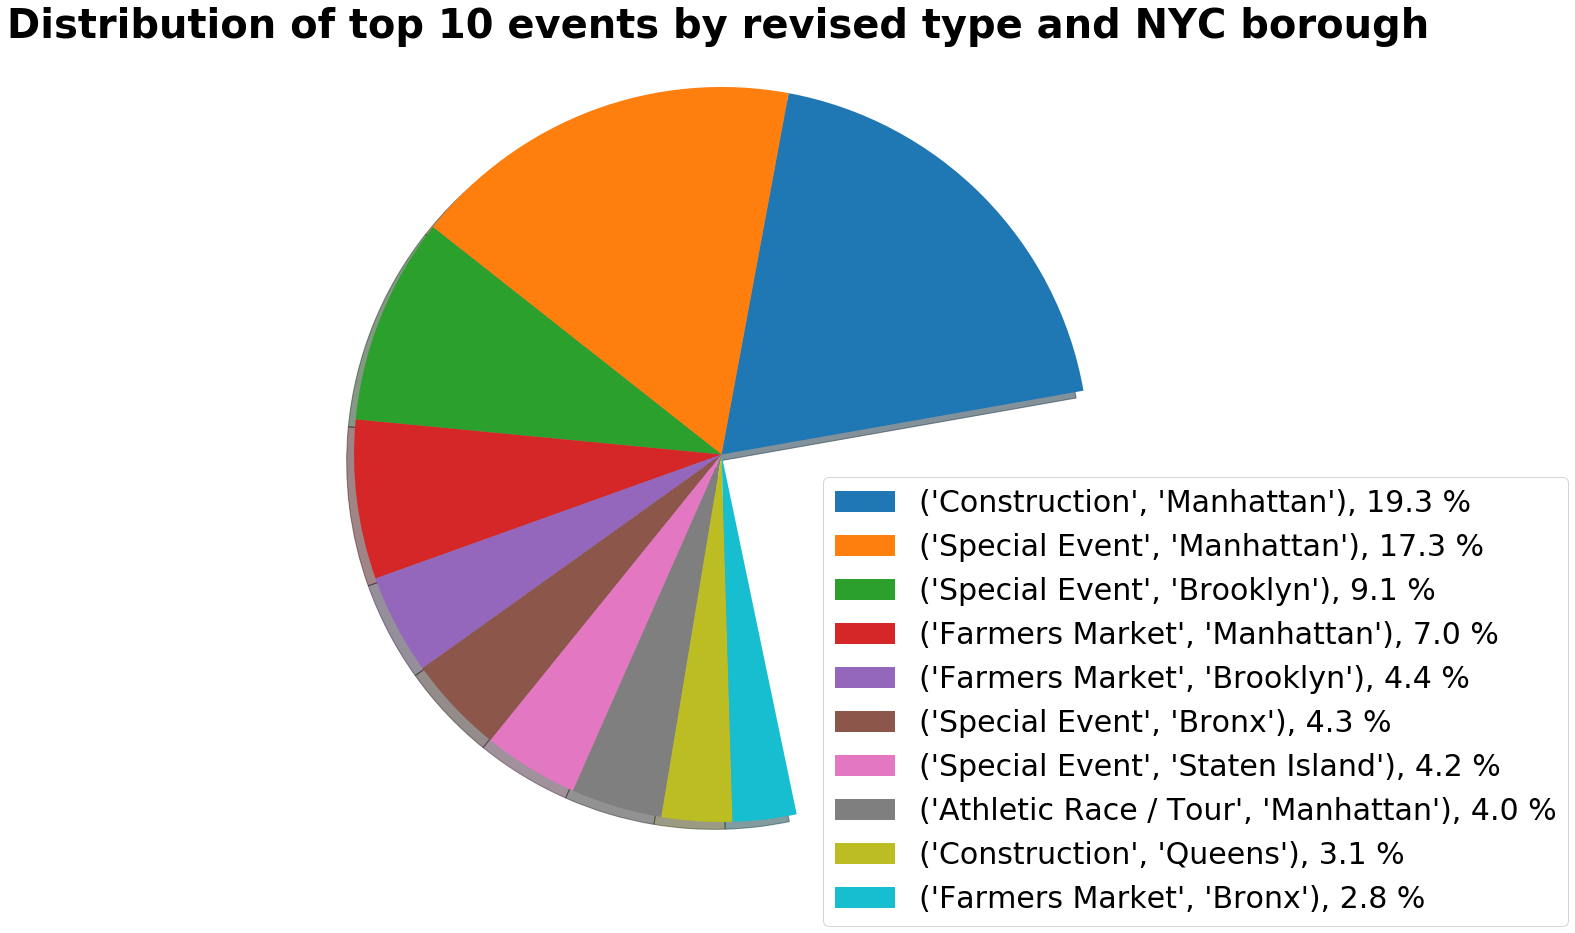

In [160]:
df3 = df2.apply(lambda x: x.sort_values(ascending=False).head(10))
pie1 = plt.pie(df3, shadow=True, startangle=10, colors=color_list2)
labels= df3.index
sizes= df3.values * 100
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
plt.axis('equal')
plt.title('Distribution of top 10 events by revised type and NYC borough', fontsize=40, fontweight='bold')
plt.legend(loc='lower right',fontsize=3, bbox_to_anchor = (1.12, -0.1), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, sizes)], prop={'size':30})
plt.show()

In [155]:
df

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,start_weekday,end_weekday,new_event_type
0,"2,",2017-11-22 20:00:00,Parks Department,Staten Island,335783,LaTourette Park & Golf Course: Model Airplane ...,"October, November December model aircraft flying",NaN,Special Event,122,2017-11-22 09:00:00,N/A,Wednesday,Wednesday,Special Event
1,"2,",2017-11-12 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,122,2017-11-12 10:00:00,N/A,Sunday,Sunday,Educational Event
2,"9,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,340926,HAMILTON PLACE between WEST 143 STREET and W...,Hamilton Heights One-Day Plaza,Full,Plaza Event,30,2017-11-22 10:00:00,Full Street Closure,Wednesday,Wednesday,Plaza Event
3,"2,",2017-11-09 11:15:00,Parks Department,Staten Island,369134,Willowbrook Park: Carousel Lawn,Tinkergarten class,NaN,Special Event,122,2017-11-09 10:00:00,N/A,Thursday,Thursday,Educational Event
4,"11,",2017-11-09 17:00:00,Street Activity Permit Office,Manhattan,324471,EAST 104 STREET between SECOND AVENUE and TH...,East Harlem Farmer's Market,Full,Farmers Market,23,2017-11-09 07:00:00,Full Street Closure,Thursday,Thursday,Farmers Market
5,"7,",2017-11-02 19:00:00,Street Activity Permit Office,Bronx,321758,EAST GUN HILL ROAD between DEKALB AVENUE and ...,Norwood Youthmarket,South,Farmers Market,52,2017-11-02 12:00:00,Partial Sidewalk Closure,Thursday,Thursday,Farmers Market
6,"7,",2017-10-28 17:00:00,Street Activity Permit Office,Brooklyn,317943,4 AVENUE between 59 STREET and 60 STREET,Sunset Park Greenmarket Saturday,West,Farmers Market,72,2017-10-28 08:00:00,Sidewalk and Curb Lane Closure,Saturday,Saturday,Farmers Market
7,"4,",2017-11-22 18:00:00,Street Activity Permit Office,Manhattan,317955,10 AVENUE between WEST 57 STREET and WEST ...,57 Street Greenmarket Wednesday Saturday,East,Farmers Market,18,2017-11-22 08:00:00,Sidewalk and Curb Lane Closure,Wednesday,Wednesday,Farmers Market
8,"2,",2017-10-28 12:00:00,Parks Department,Brooklyn,376147,Pierrepont Playground: Pierrepont Playground,Pierrepont Playground Halloween Parade,NaN,Special Event,84,2017-10-28 10:00:00,N/A,Saturday,Saturday,Parade
9,"7,",2017-10-25 16:00:00,Parks Department,Bronx,330038,Mosholu Parkway: Mosholu Parkway,North Central Bronx Farmer's Market,NaN,Special Event,52,2017-10-25 08:00:00,N/A,Wednesday,Wednesday,Farmers Market


In [156]:
# Let's see if we can map the locations of these events using the police_precinct locations
# But first we need to get the locations of the police_precincts
# put this infomation http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nypp/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson
#into the file nyc_police.geojson

In [157]:
from geojson import Point, Polygon
import geopandas as gpd

In [158]:
p1 = Point(0,0)
polygon = Polygon([(0,0),(1,1),(1,0)])
geo = '/Users/isobel/Desktop/nyc_police.geojson'
police_file = gpd.read_file(geo)
print(police_file.head(5))

   OBJECTID  Precinct  Shape__Area  Shape__Length  \
0         1         1     0.000467       0.254979   
1         2         5     0.000179       0.058732   
2         3         6     0.000219       0.089653   
3         4         7     0.000182       0.055191   
4         5         9     0.000212       0.064563   

                                            geometry  
0  (POLYGON ((-74.0438790750036 40.6901959270161,...  
1  POLYGON ((-73.98864007205179 40.7229419792595,...  
2  POLYGON ((-73.9996853696554 40.7385605103274, ...  
3  POLYGON ((-73.9734546796565 40.7189711458324, ...  
4  POLYGON ((-73.971610440804 40.7267316615053, -...  


In [159]:
file2 = police_file.to_json()